# Train R2019 2010 on Log Gradients

# imports

In [1]:
import os 
import shutil
from pkg_resources import resource_filename


from ulmo.models import DCAE, ConditionalFlow
from ulmo.ood import ood

Cartopy not installed.  Some plots will not work!


# Init Model

In [2]:
dpath = '/home/jovyan/Oceanography/SST-OOD'
datadir= os.path.join(dpath, 'Models', 'R2019_2010_128x128_loggrad')
model_file = os.path.join(resource_filename('ulmo', 'models'), 'options', 'pae_model_std.json')
preproc_file = os.path.join(dpath, 'PreProc', 'MODIS_R2019_2010_95clear_128x128_preproc_loggrad.h5')

# Do it
pae = ood.ProbabilisticAutoencoder.from_json(model_file, 
                                             filepath=preproc_file,
                                             datadir=datadir, logdir=datadir)

# Train the AutoEncoder

135,680 training samples. 542,720 validation samples.


Training stopped. Save model (y/n)? y


Model saved.
Loading autoencoder model from: /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_loggrad/autoencoder.pt


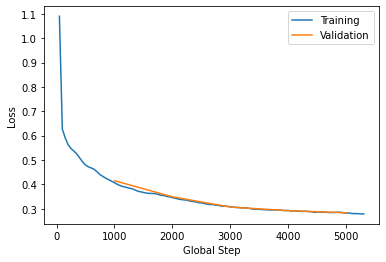

In [3]:
pae.train_autoencoder(n_epochs=10, batch_size=256, lr=2.5e-3, summary_interval=50, eval_interval=1000)

## Save model params

In [4]:
shutil.copyfile(model_file, os.path.join(datadir, 'model.json'))

'/home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_loggrad/model.json'

## Examine outputs

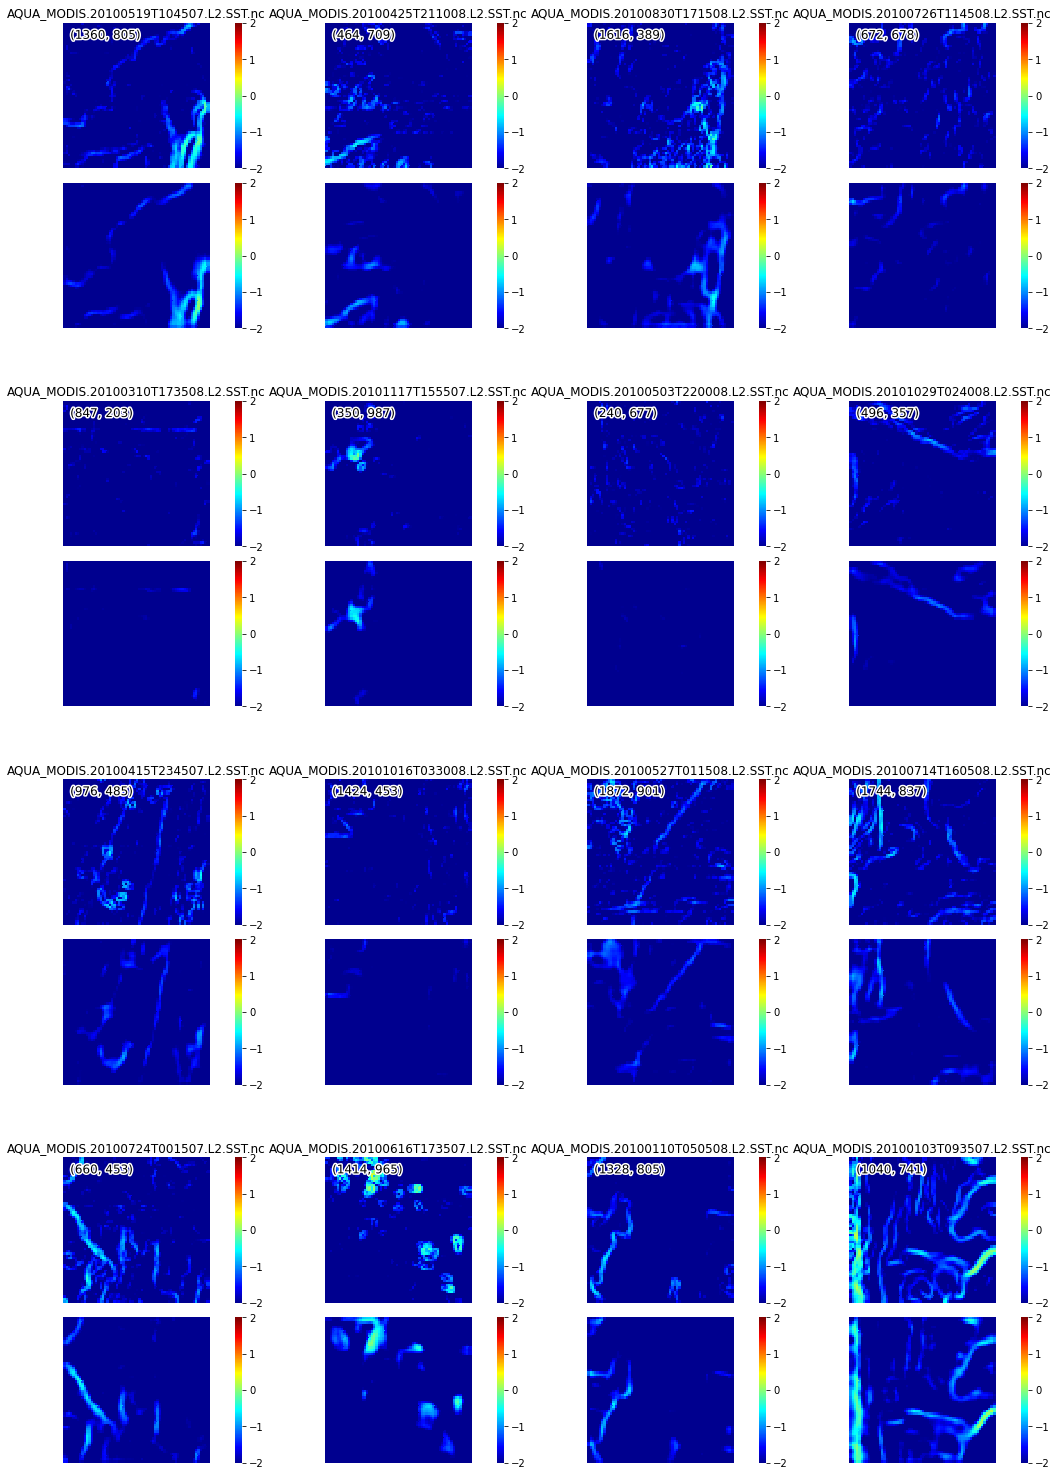

In [5]:
pae.plot_reconstructions()

# Flow

Existing latents file found. Use file (y) or recompute (n)? n


137,216 training samples. 544,768 validation samples.



135,680 training samples. 542,784 validation samples.


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training stopped. Save model (y/n)? y


Model saved.
Loading flow model from: /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_loggrad/flow.pt


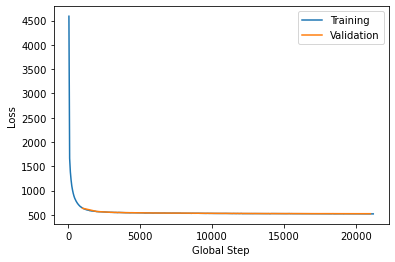

In [3]:
pae.train_flow(n_epochs=10, batch_size=64, lr=2.5e-4, summary_interval=50, eval_interval=1000)

# Probabilities

136,192 training samples. 543,744 validation samples.


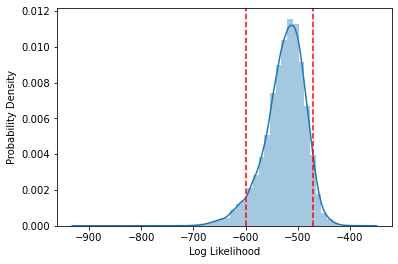

In [4]:
pae.plot_log_probs()

# Plot

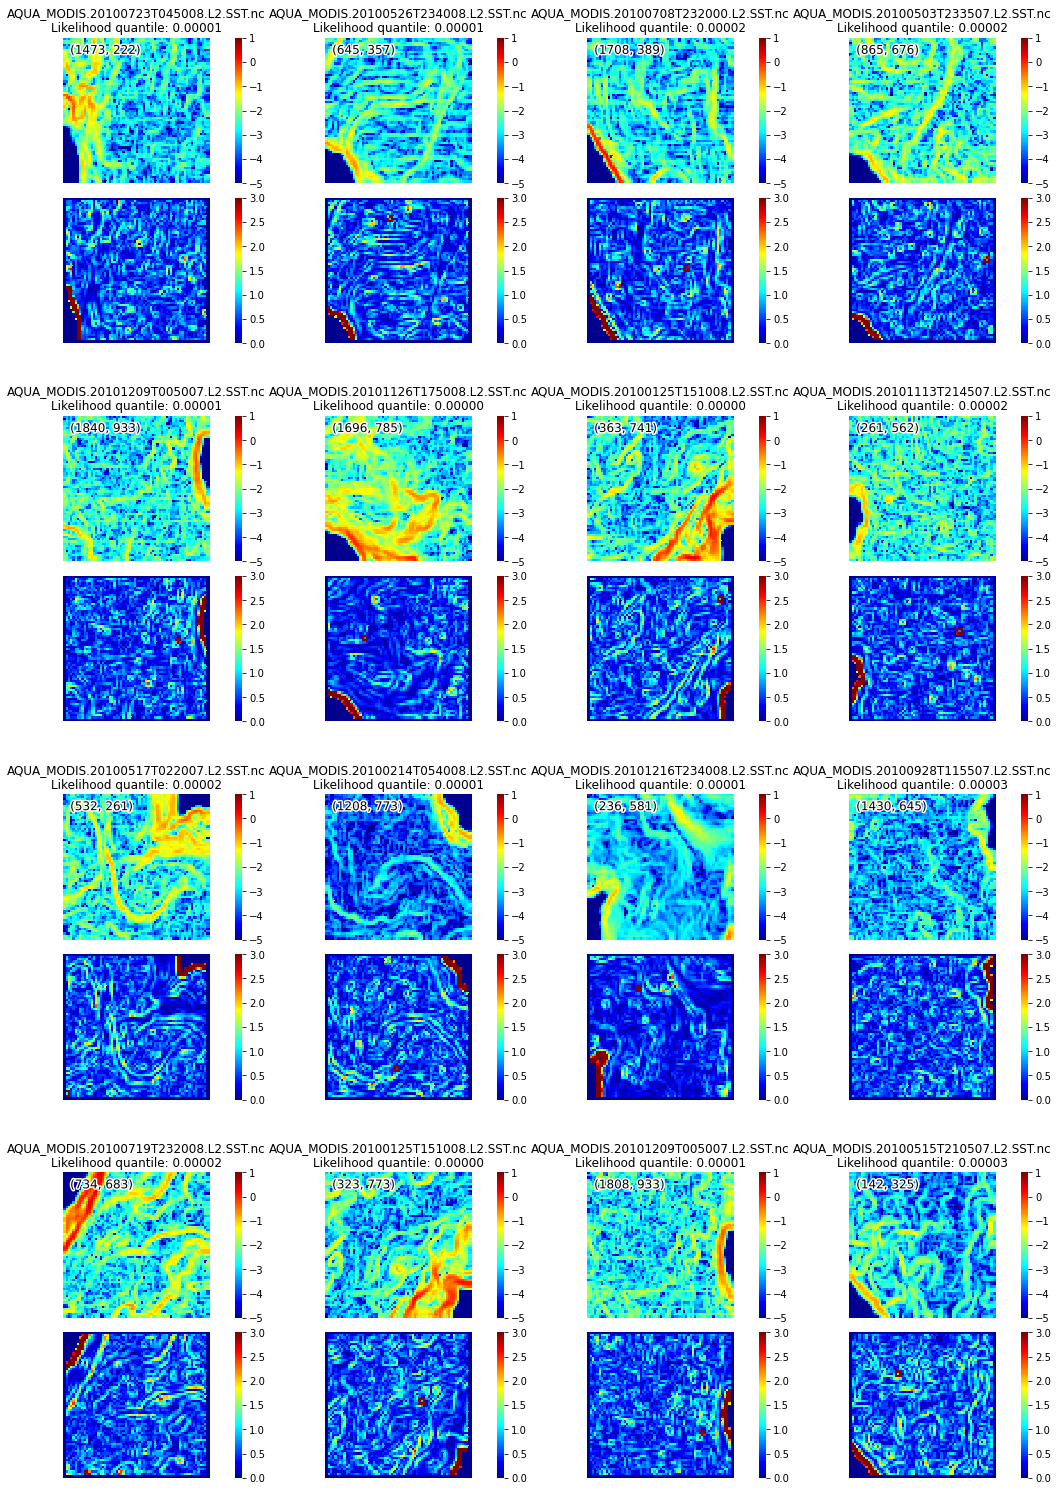

In [9]:
pae.plot_grid('least likely', vmin=-5, vmax=1, grad_vmax=3, save_figure=True)

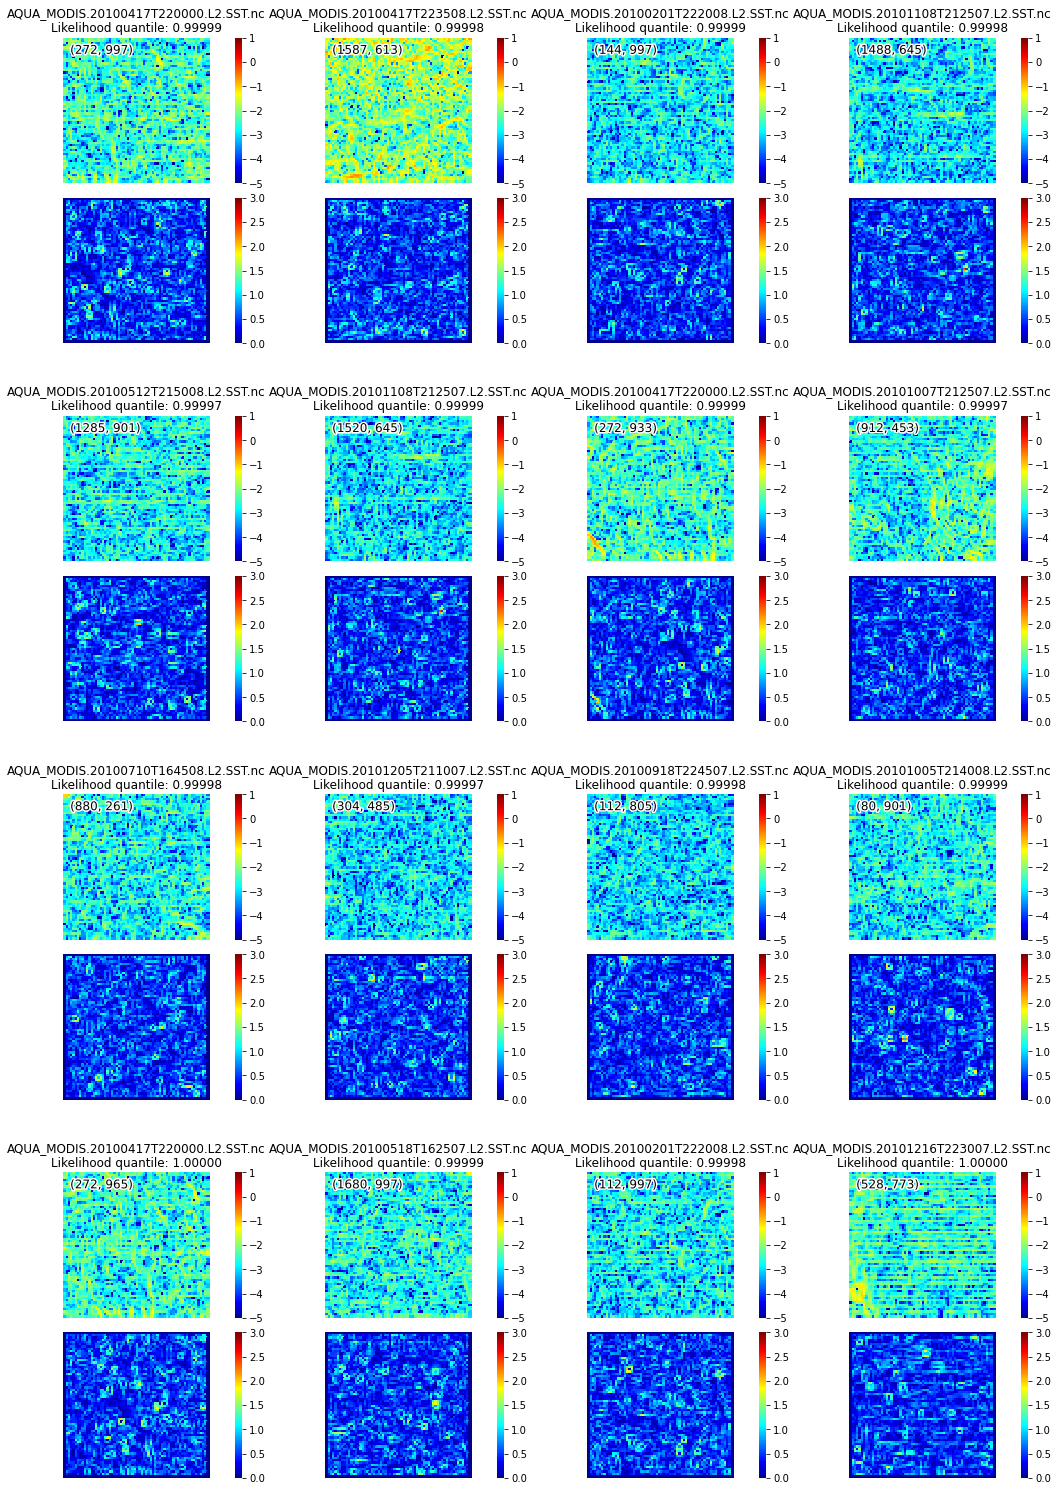

In [11]:
pae.plot_grid('most likely', vmin=-5, vmax=1, grad_vmax=3)#, save_figure=True)

# Save

In [5]:
pae.save_log_probs()

Saved log probabilities to /home/jovyan/Oceanography/SST-OOD/Models/R2019_2010_128x128_loggrad/MODIS_R2019_2010_95clear_128x128_preproc_loggrad_log_probs.csv.
